In [ ]:
# MATCH (a:Author)-[:AUTHORED]->(:Quanta)-[m:METRICS_IN]->(:Year {year: 2019})
# WITH m
# ORDER BY m.timeScaledPageRank DESC
# with collect(m) as scores
# with scores, size(scores) as n
# match (a2:Author)-[:AUTHORED]->(:Quanta)-[m2:METRICS_IN]->(:Year {year: 2019})
# where a2.cleanName in
#     ['piyushgupta', 'philstephens', 'thomasliem',
#     'stephenpnaber', 'philipghaydon', 'barrymberger',
#     'bhishamchera', 'gaoravpgupta']
# with 
#     a2.cleanName as name,
#     m2.timeScaledPageRank as tspr, 
#     size([x in scores where m2.timeScaledPageRank < x.timeScaledPageRank | x])/size(scores) as rank
# return 
#     name, avg(rank) as avgRank, max(rank) as maxRank, percentileCont(rank, 0.5) as medianRank

In [78]:
import pandas as pd
import seaborn as sns

import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.set(style='whitegrid')

In [92]:
csvpath = '/Users/jww/Downloads/export-16.csv'
df = pd.read_csv(csvpath)
df = df.dropna()

df['score'] = (1-df['rank']/df['n'])*100

namemap = {'stephenpnaber': "Stephen Naber",
           'philipghaydon': "Phillip Haydon",
           'piyushgupta': "Piyush Gupta",
           'gaoravpgupta': "Gaorav Gupta",
           'philstephens': "Phil Stephens",
           'barrymberger': "Barry Berger"}

df['displayName'] = df['name'].apply(lambda x: namemap[x])

df.head(20)

,name,tspr,rank,n,score,displayName
0,stephenpnaber,0.302948,2147888,12077638,82.215993,Stephen Naber
1,philipghaydon,0.098650,6338354,12077638,47.519921,Phillip Haydon
2,stephenpnaber,0.305579,2010840,12077638,83.350718,Stephen Naber
4,piyushgupta,2.058493,304922,12077638,97.475318,Piyush Gupta
6,stephenpnaber,0.382874,1285226,12077638,89.358631,Stephen Naber
7,philipghaydon,0.064936,6827210,12077638,43.472308,Phillip Haydon
8,gaoravpgupta,0.221501,3735045,12077638,69.074706,Gaorav Gupta
10,philstephens,0.305579,2010840,12077638,83.350718,Phil Stephens
11,philstephens,0.305579,2010840,12077638,83.350718,Phil Stephens
15,barrymberger,0.318278,1683477,12077638,86.061207,Barry Berger


In [93]:
import numpy as np
df['sigmoid'] = df['score'].apply(lambda x: 1/(1+np.exp(-x)))

In [94]:
df.describe()

,tspr,rank,n,score,sigmoid
count,90.000000,9.000000e+01,90.0,90.000000,90.0
mean,0.675879,2.750472e+06,12077638.0,77.226742,1.0
std,1.120300,1.955837e+06,0.0,16.193869,0.0
min,0.031335,5.305200e+04,12077638.0,41.966931,1.0
25%,0.211245,1.248576e+06,12077638.0,68.051444,1.0
50%,0.302948,2.147888e+06,12077638.0,82.215993,1.0
75%,0.401362,3.858631e+06,12077638.0,89.662080,1.0
max,6.818929,7.009024e+06,12077638.0,99.560742,1.0


[Text(0, 0.5, ''), Text(0.5, 0, 'Scaled Scientific Credibility Score')]

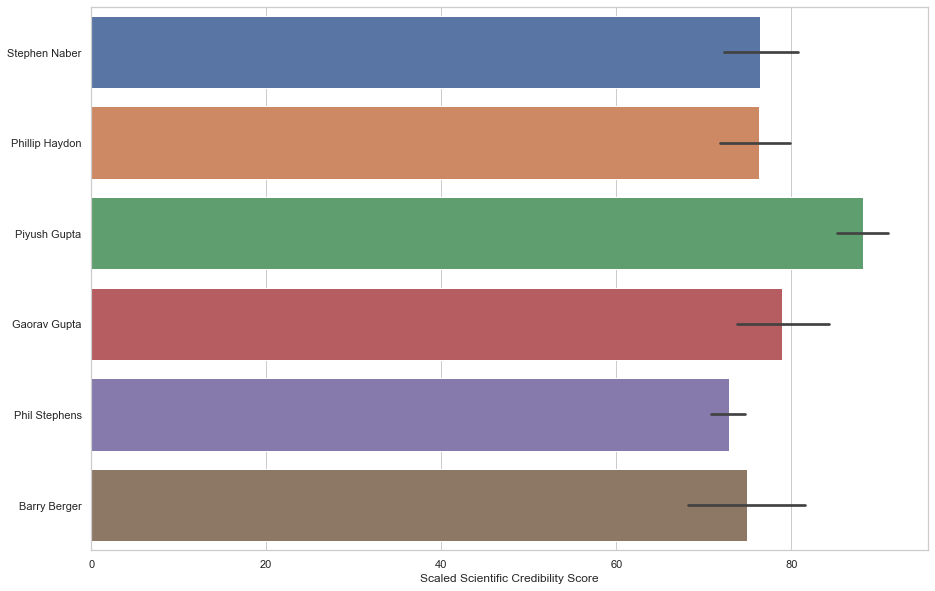

In [95]:
ax = sns.barplot(data=df, y='displayName', x='score', orient='h', ci=67)
ax.set(xlabel='Scaled Scientific Credibility Score', ylabel='')

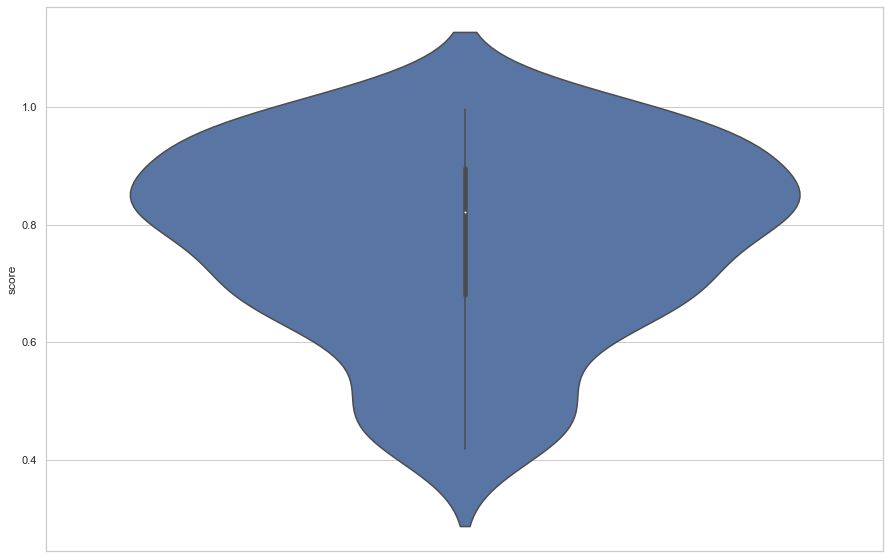

In [67]:
sns.violinplot(data=df, x=None, y='score', hue='name')

In [96]:
csvpath = '/Users/jww/Downloads/authorscores.csv'
df = pd.read_csv(csvpath)
df = df.dropna()
df.columns = ['cleanName', 'avg_tspr', 'max_tspr', 'min_tspr', 'sum_tspr']

namemap = {'stephenpnaber': "Stephen Naber",
           'philipghaydon': "Phillip Haydon",
           'piyushgupta': "Piyush Gupta",
           'gaoravpgupta': "Gaorav Gupta",
           'philstephens': "Phil Stephens",
           'barrymberger': "Barry Berger"}

df['displayName'] = df['cleanName'].apply(lambda x: namemap[x] if x in namemap.keys() else None)
df['Team Member'] = df['cleanName'].apply(lambda x: True if x in namemap.keys() else False)

df['avg_rank'] = df['avg_tspr'].rank(pct=True)*100
df['sum_rank'] = df['sum_tspr'].rank(pct=True)*100

df.head(20)

,cleanName,avg_tspr,max_tspr,min_tspr,sum_tspr,displayName,Team Member,avg_rank,sum_rank
3,leonardpetrucelli,0.773802,5.031803,0.036376,27.083053,None,False,89.542200,99.241227
4,taniafgendron,1.075368,5.031803,0.085198,16.130519,None,False,92.697354,98.463278
5,jeffreyanickerson,0.259709,1.071698,0.018444,5.194189,None,False,56.084229,93.854844
6,zhipingweng,0.977276,11.723837,0.081764,44.954695,None,False,91.894231,99.636665
7,yubinglu,0.685662,2.339457,0.062164,3.428312,None,False,88.154115,90.562929
8,sandraalmeida,0.517324,2.339457,0.036376,4.138590,None,False,84.484019,92.171031
9,umadevichalasani,0.554212,0.554212,0.554212,0.554212,None,False,85.467171,62.061356
10,fenbiaogao,0.393186,2.339457,0.036376,8.256900,None,False,80.143788,96.370976
11,jillmoore,0.257732,0.554212,0.085198,0.773197,None,False,55.678585,69.478836
12,xingdu,0.332530,0.898382,0.085198,2.327713,None,False,77.070096,86.516879


[Text(0, 0.5, 'Scaled Mean Scientific Impact Score')]

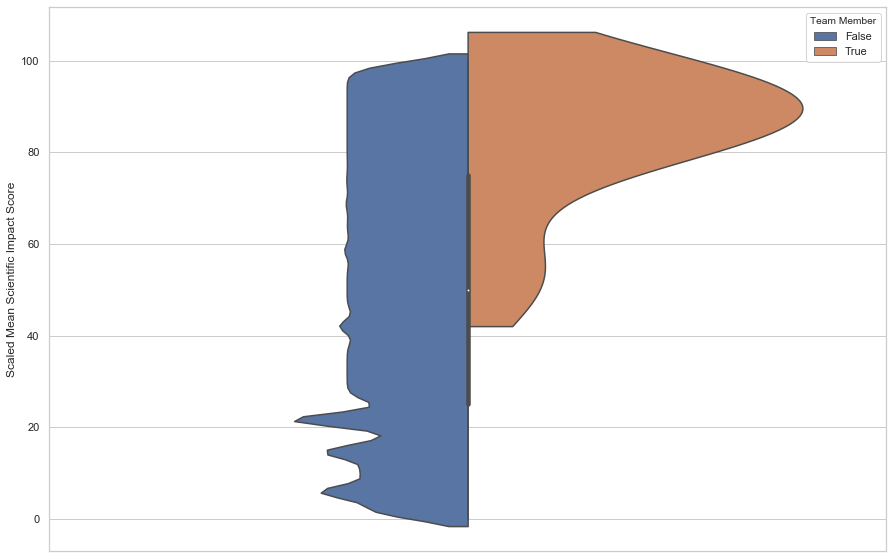

In [97]:
ax = sns.violinplot(y=df['avg_rank'], x=[""]*len(df), hue=df['Team Member'], split=True, cut=True)
ax.set(ylabel='Scaled Mean Scientific Impact Score')

[Text(0, 0.5, 'Scaled Scientific Credibility Score'),
 [Text(0, 0, 'Average'), Text(0, 0, 'Cumulative')],
 Text(0.5, 0, '')]

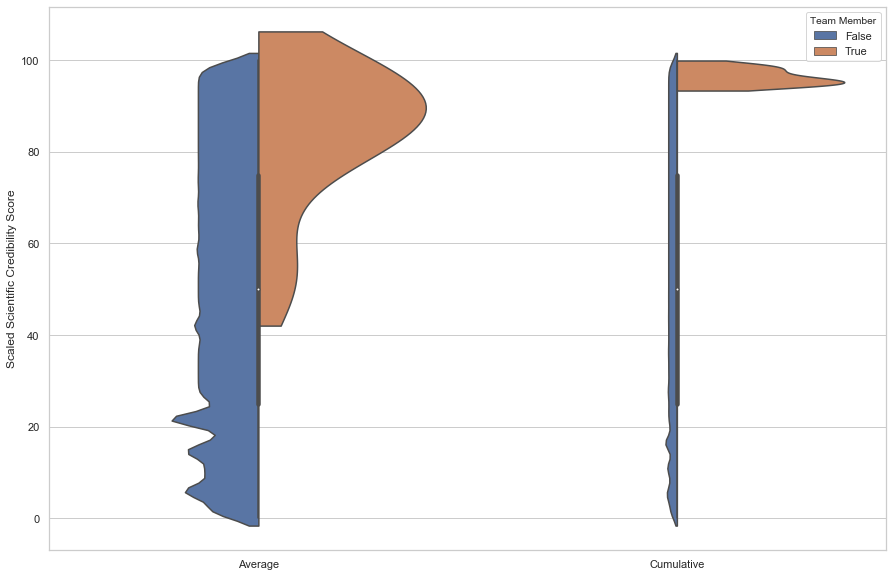

In [98]:
ax = sns.violinplot(x='variable', y='value', hue='Team Member', split=True, cut=True,
    data=df.melt(value_vars=['avg_rank', 'sum_rank'], id_vars=['cleanName', 'Team Member']))

ax.set(ylabel='Scaled Scientific Credibility Score', xlabel='', 
       xticklabels=['Average','Cumulative'])

In [99]:
df

,cleanName,avg_tspr,max_tspr,min_tspr,sum_tspr,displayName,Team Member,avg_rank,sum_rank
3,leonardpetrucelli,0.773802,5.031803,0.036376,27.083053,None,False,89.542200,99.241227
4,taniafgendron,1.075368,5.031803,0.085198,16.130519,None,False,92.697354,98.463278
5,jeffreyanickerson,0.259709,1.071698,0.018444,5.194189,None,False,56.084229,93.854844
6,zhipingweng,0.977276,11.723837,0.081764,44.954695,None,False,91.894231,99.636665
7,yubinglu,0.685662,2.339457,0.062164,3.428312,None,False,88.154115,90.562929
8,sandraalmeida,0.517324,2.339457,0.036376,4.138590,None,False,84.484019,92.171031
9,umadevichalasani,0.554212,0.554212,0.554212,0.554212,None,False,85.467171,62.061356
10,fenbiaogao,0.393186,2.339457,0.036376,8.256900,None,False,80.143788,96.370976
11,jillmoore,0.257732,0.554212,0.085198,0.773197,None,False,55.678585,69.478836
12,xingdu,0.332530,0.898382,0.085198,2.327713,None,False,77.070096,86.516879
